## k-Nearest Neighbors Classifier Model

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [14]:
#Data Clean
def df_clean():   
    path = '/Users/ivnagpal/Desktop/Enron Final Project/MACS31300_Final_Project'
    os.chdir(path)
    df = pd.read_csv (r'enron.csv')
    df = df.drop(columns=['email_address','position']) 
    df = df.fillna(df.mean())
    df['POI'] = df['POI'].replace({'No': 0, 'Yes': 1})
    return df
    
df = df_clean()

#Freatures
x = df.drop (columns = ['insider','POI'])

#Labels
y = df[['POI']]

In [15]:
#70/30 Training and Testing Split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state= 18)

We conduct a 70/30 split on this dataset, reserving 30% of the data to test the prediction abilities of our kNN model. We chose a 70/30 rather than the convential 80/20 split because of the sparse number of POIs. Out of the 144 observations, only 12% were labeled as POIs. 

Text(0, 0.5, 'Accuracy')

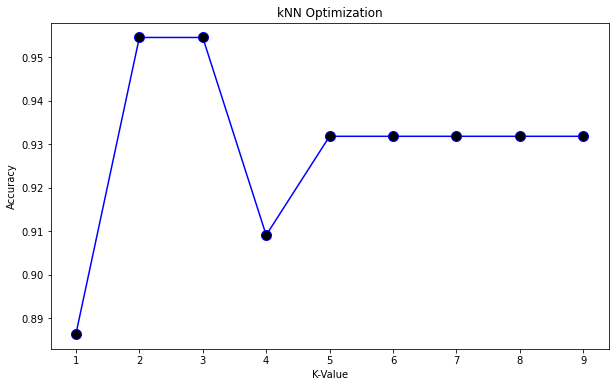

In [5]:
tot_acc = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    tot_acc.append(accuracy_score(y_test, pred_i))
plt.figure(figsize=(10,6))
plt.plot(range(1,10),tot_acc,color='blue', linestyle='-', 
         marker='.',markerfacecolor='black', markersize=20)
plt.title('kNN Optimization')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')

We seek to identify a k value which maximizes accuracy and minimizes error. We run the training data through kNN models with k values ranging from 1 to 9, and find that accuracy is maximized when k = 2 and 3. Thus, we evaluate performance of kNN models with those two paramteters. 

In [16]:
null_accuracy= 1- y_test.mean()
null_error= y_test.mean()
print ("null accuracy:", null_accuracy)
print ("null error:", null_error)

null accuracy: POI    0.931818
dtype: float64
null error: POI    0.068182
dtype: float64


We consider a dummy model, which would classify every insider in the testing dataset as a non-POI. This dummy model would be correct 93.18% of the time, which we set as a baseline to evaluate the effacy of the kNN (k=2) and kNN (k=3) model.

### kNN Model with two neighbors (k=2)

In [18]:
#kNN (2 Neighbors)
knn_2 = KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)
knn2_predict = knn_2.predict (x_test)
knn2_confusion = confusion_matrix(y_test,knn2_predict)
knn2_accuracy = accuracy_score (y_test,knn2_predict)
knn2_error = 1 - knn2_accuracy

print ('kNN (K = 2) Confusion Matrix:')
print (knn2_confusion)
print (round(knn2_accuracy,3))
print (round (knn2_error,3))

kNN (K = 2) Confusion Matrix:
[[41  0]
 [ 2  1]]
0.955
0.045


### kNN Model with three neighbors (k=3)

In [19]:
#kNN (3 Neighbors)
knn_3 = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
knn3_predict = knn_3.predict (x_test)
knn3_confusion = confusion_matrix(y_test,knn3_predict)
knn3_accuracy = accuracy_score (y_test,knn3_predict)
knn3_error = 1 - knn3_accuracy
print ('kNN (K = 3) Confusion Matrix:')
print (knn3_confusion)
print (round(knn3_accuracy,3))
print (round (knn3_error,3))

kNN (K = 3) Confusion Matrix:
[[40  1]
 [ 1  2]]
0.955
0.045


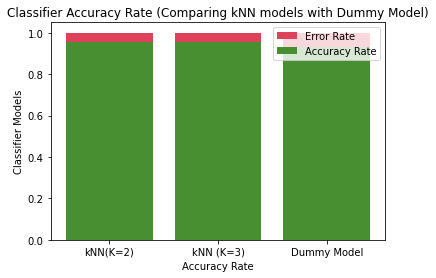

In [20]:
#Error Bar Graph
models = ['kNN(K=2)','kNN (K=3)','Dummy Model' ]
accuracy = np.array(knn2_accuracy + knn3_accuracy + null_accuracy)
a_bar = [knn2_accuracy, knn3_accuracy, null_accuracy]
a_bar = [float(i) for i in a_bar]

e_bar = [knn2_error, knn3_error, null_error]
e_bar = [float(i) for i in e_bar]
ind = [x for x, _ in enumerate(models)]

plt.bar(ind, e_bar, width=0.8, label='Error Rate', color='#de425b', bottom=a_bar)
plt.bar(ind, a_bar, width=0.8, label='Accuracy Rate', color='#488f31')
plt.xticks(ind, models)
plt.ylabel("Classifier Models")
plt.xlabel("Accuracy Rate")
plt.legend(loc="upper right")
plt.title("Classifier Accuracy Rate (Comparing kNN models with Dummy Model)")
plt.show()

Both kNN models have an accuracy rate of 95.5% which is +2.32% better than the dummy model. We need to conduct sensitivity and specificity analysis, using the consuion matrix, to get a better understanding of the model's ability to identify POI. 


In [10]:
print ('kNN (K = 2) Confusion Matrix:')
print (knn2_confusion)
print ('\nkNN (K = 3) Confusion Matrix:')
print (knn3_confusion)

kNN (K = 2) Confusion Matrix:
[[41  0]
 [ 2  1]]

kNN (K = 3) Confusion Matrix:
[[40  1]
 [ 1  2]]


We turn to each model's sensitivity and speficity rates to evaluate its performance. Sensitivity rate shows the percentage of actual positive in the testing data the model predicted as positive. The k=2 model had a sensitivity rate of 33.3%, predicting 1 out of the 3 POIs. The k=3 model had a higher sensitivity rate of 66.7%, predicting 2 out of the the POIs. The specificity rate looks at the number of negatives in the testing data the model predicts and negative. The k = 2 model identified the non-POIs in the testing data 100% of the time. The k=3 model did marginally worse, identifying the non-POIs 97.56% of the time. The k=2 model, is better at identifying non-POIs and the k=3 model is better a identifying POIs. Both models are better at classifying insiders as POIs/Non-POIs then a dummy model which labels every testing insider either as a non-POI or a POI. 